# Loi de Benford et données d'abondance de protéines
Ce script a pour but de vérifier si l'abondance de protéines, de 2 fichiers d'abondances de protéines extrait depuis [PRIDE](https://www.ebi.ac.uk/pride/) du projet PXD019559, suit la loi de Benford.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys

sys.path.insert(0, '..')

import benford

%load_ext autoreload
%autoreload 2

## Téléchargement du jeu de données

In [2]:
if not os.path.exists("raw_abundance_table_1.txt"):
    ! wget https://www.ebi.ac.uk/pride/data/archive/2020/07/PXD019559/raw_abundance_table_1.txt
if not os.path.exists("raw_abundance_table_2.txt"):
    ! wget https://www.ebi.ac.uk/pride/data/archive/2020/07/PXD019559/raw_abundance_table_2.txt

## Chargement et exploration du jeu de données raw_abundance_table_1.txt et raw_abundance_table_2.txt
### <font color='green'>raw_abundance_table_1.txt</font> 

In [3]:
data = pd.read_csv("raw_abundance_table_1.txt", delimiter="\t", skiprows=0)

In [4]:
data.shape

(1917, 55)

In [5]:
data.head()

,Accession,Peptide count,Unique peptides,Confidence score,Anova (p),Max fold change,Description,WT_control_1,WT_control_2,AMFR_1,...,RNFT1_1,RNFT1_2,Tmem129_1,Tmem129_2,Trim13_1,Trim13_2,Trim59_1,Trim59_2,ZNRF4_1,ZNRF4_2
0,P62306,1,1,92.54,0.0,146.250416,Small nuclear ribonucleoprotein F OS=Homo sapi...,1.597321e+06,1.510281e+06,653449.78450,...,1.031725e+06,8.946137e+05,685599.113800,622240.798000,3.612258e+05,4.090111e+05,542880.771500,577099.865000,723632.233300,369505.163300
1,P00738,2,1,120.92,0.0,11.860484,Haptoglobin OS=Homo sapiens GN=HP PE=1 SV=1,2.571727e+06,2.227859e+06,939360.24170,...,4.768931e+05,4.418349e+05,543889.881000,605881.526900,1.130502e+06,1.066964e+06,364056.310300,336637.678800,346912.799800,290904.602200
2,Q14574,2,1,68.78,0.0,inf,Desmocollin-3 OS=Homo sapiens GN=DSC3 PE=1 SV=3,1.267556e+04,1.148202e+04,2578.10604,...,1.665226e+04,1.272385e+04,927.292206,721.778363,1.455537e+03,5.289084e+03,549.407043,873.451386,3540.070679,1922.103598
3,P62942,2,2,192.71,0.0,14.602234,Peptidyl-prolyl cis-trans isomerase FKBP1A OS=...,1.082784e+06,7.226234e+05,170103.36070,...,5.264412e+05,4.712341e+05,129784.308800,172422.538100,5.451802e+04,6.912112e+04,99581.120720,93295.618290,99816.192810,94214.225140
4,P14174,2,2,139.51,0.0,18.804068,Macrophage migration inhibitory factor OS=Homo...,3.847340e+06,3.328870e+06,696620.77780,...,1.083375e+06,1.301425e+06,581763.270800,691786.657400,2.647066e+05,3.463574e+05,376276.827000,430823.038700,414007.508500,320752.227500


In [6]:
data.columns

Index(['Accession', 'Peptide count', 'Unique peptides', 'Confidence score',
       'Anova (p)', 'Max fold change', 'Description', 'WT_control_1',
       'WT_control_2', 'AMFR_1', 'AMFR_2', 'BFAR_1', 'BFAR_2', 'CGRRF1_1',
       'CGRRF1_2', 'HRD1_1', 'HRD1_2', 'MARCH2_1', 'MARCH2_2', 'MARCH3_1',
       'MARCH3_2', 'MARCH4_1', 'MARCH4_2', 'MARCH6_1', 'MARCH6_2', 'MARCH8_1',
       'MARCH8_2', 'RNF5_1', 'RNF5_2', 'RNF13_1', 'RNF13_2', 'RNF26_1',
       'RNF26_2', 'RNF103_1', 'RNF103_2', 'RNF128_1', 'RNF128_2', 'RNF139_1',
       'RNF139_2', 'RNF148_1', 'RNF148_2', 'RNF170_1', 'RNF170_2', 'RNF185_1',
       'RNF185_2', 'RNFT1_1', 'RNFT1_2', 'Tmem129_1', 'Tmem129_2', 'Trim13_1',
       'Trim13_2', 'Trim59_1', 'Trim59_2', 'ZNRF4_1', 'ZNRF4_2'],
      dtype='object')

In [7]:
data.describe()

,Peptide count,Unique peptides,Confidence score,Anova (p),Max fold change,WT_control_1,WT_control_2,AMFR_1,AMFR_2,BFAR_1,...,RNFT1_1,RNFT1_2,Tmem129_1,Tmem129_2,Trim13_1,Trim13_2,Trim59_1,Trim59_2,ZNRF4_1,ZNRF4_2
count,1917.000000,1917.000000,1917.000000,1.686000e+03,1686.000000,1.917000e+03,1.917000e+03,1.917000e+03,1.917000e+03,1.917000e+03,...,1.917000e+03,1.917000e+03,1.917000e+03,1.917000e+03,1.917000e+03,1.917000e+03,1.917000e+03,1.917000e+03,1.917000e+03,1.917000e+03
mean,7.703182,5.748565,524.507366,2.044765e-02,inf,1.450945e+07,1.167597e+07,6.771586e+06,6.530283e+06,7.970426e+06,...,5.262449e+06,5.061042e+06,6.457390e+06,6.324781e+06,4.416519e+06,5.437701e+06,4.972108e+06,5.970891e+06,5.795576e+06,5.929622e+06
std,12.325655,9.653518,1069.470551,8.353295e-02,NaN,2.431987e+08,1.954770e+08,1.106233e+08,1.062132e+08,1.338884e+08,...,8.109688e+07,7.745157e+07,1.049003e+08,1.012173e+08,7.343538e+07,9.360917e+07,8.429700e+07,1.008382e+08,9.375301e+07,9.590334e+07
min,1.000000,0.000000,20.090000,0.000000e+00,2.102359,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000,1.000000,80.520000,2.295000e-11,8.323138,1.001500e+04,6.973303e+03,3.431016e+03,3.559545e+03,4.942978e+03,...,9.305063e+03,9.521564e+03,2.835270e+03,2.633716e+03,1.219816e+03,1.097948e+03,1.032123e+03,8.398080e+02,4.477968e+03,1.561814e+03
50%,4.000000,3.000000,204.820000,2.200000e-08,20.804422,1.306292e+05,9.904392e+04,4.598567e+04,5.040053e+04,6.157182e+04,...,7.879131e+04,7.926856e+04,3.593127e+04,3.666904e+04,2.330468e+04,2.593749e+04,2.233400e+04,2.554444e+04,5.060903e+04,2.922629e+04
75%,9.000000,7.000000,547.090000,1.671580e-04,198.777600,7.422822e+05,5.692127e+05,2.854443e+05,2.981701e+05,3.768043e+05,...,4.129133e+05,4.201421e+05,2.380012e+05,2.330490e+05,1.469063e+05,1.609766e+05,1.590611e+05,1.723112e+05,3.075652e+05,1.693491e+05
max,228.000000,155.000000,22066.130000,8.741167e-01,inf,7.102946e+09,5.344566e+09,3.016153e+09,2.876725e+09,3.687347e+09,...,2.049018e+09,2.018134e+09,2.697112e+09,2.429316e+09,1.879069e+09,2.467022e+09,2.275035e+09,2.547731e+09,2.470082e+09,2.522217e+09


On remarque qu'il y a 2 conditions WT et 6 autres condition.

### <font color='green'>raw_abundance_table_2.txt</font> 

In [9]:
data2 = pd.read_csv("raw_abundance_table_2.txt", delimiter="\t", skiprows=0)

In [10]:
data2.shape

(1871, 27)

In [11]:
data2.head()

,Accession,Peptide count,Unique peptides,Confidence score,Anova (p),Max fold change,Description,R26_N_1,R26_N_2,R26_NM_1,...,R150_1,R150_2,Pool_1,Pool_2,HRD1_rerun_1,HRD1_rerun_2,R13_repeat_1,R13_repeat_2,ZNRF4_repeat_1,ZNRF4_repeat_2
0,Q9UK59,2,1,63.90,0.0,inf,Lariat debranching enzyme OS=Homo sapiens GN=D...,0.0,0.0,0.0,...,37555.23096,3.913464e+04,0.0,0.0,0.000,0.0000,0.0,0.0,0.0000,0.0000
1,P68402,2,1,69.73,0.0,inf,Platelet-activating factor acetylhydrolase IB ...,0.0,0.0,0.0,...,775911.54020,1.136750e+06,0.0,0.0,0.000,0.0000,0.0,0.0,0.0000,0.0000
2,Q9Y3E0,1,1,42.24,0.0,inf,Vesicle transport protein GOT1B OS=Homo sapien...,0.0,0.0,0.0,...,0.00000,0.000000e+00,0.0,0.0,178409.584,126520.4523,0.0,0.0,0.0000,0.0000
3,P61006,3,1,201.24,0.0,inf,Ras-related protein Rab-8A OS=Homo sapiens GN=...,0.0,0.0,0.0,...,122061.77150,1.597211e+05,0.0,0.0,0.000,0.0000,0.0,0.0,0.0000,0.0000
4,Q9BPW8,1,1,29.73,0.0,inf,Protein NipSnap homolog 1 OS=Homo sapiens GN=N...,0.0,0.0,0.0,...,0.00000,0.000000e+00,0.0,0.0,0.000,0.0000,0.0,0.0,376794.8466,418675.2332


In [37]:
data2.describe()

,Peptide count,Unique peptides,Confidence score,Anova (p),Max fold change,R26_N_1,R26_N_2,R26_NM_1,R26_NM_2,R13_1,...,R150_1,R150_2,Pool_1,Pool_2,HRD1_rerun_1,HRD1_rerun_2,R13_repeat_1,R13_repeat_2,ZNRF4_repeat_1,ZNRF4_repeat_2
count,1871.000000,1871.000000,1871.000000,1.676000e+03,1676.000000,1.871000e+03,1.871000e+03,1.871000e+03,1.871000e+03,1.871000e+03,...,1.871000e+03,1.871000e+03,1.871000e+03,1.871000e+03,1.871000e+03,1.871000e+03,1.871000e+03,1.871000e+03,1.871000e+03,1.871000e+03
mean,8.287547,6.128808,504.043068,1.479526e-02,inf,1.095139e+07,1.077093e+07,1.044265e+07,1.019498e+07,1.215600e+07,...,1.167015e+07,1.190642e+07,1.193684e+07,1.191616e+07,1.158439e+07,1.165333e+07,1.208248e+07,1.160224e+07,1.263682e+07,1.360353e+07
std,14.073020,10.728640,1222.186081,6.262363e-02,NaN,1.928076e+08,1.900138e+08,2.117533e+08,2.086545e+08,2.062331e+08,...,1.470457e+08,1.458234e+08,2.421096e+08,2.412375e+08,2.391984e+08,2.416312e+08,2.740485e+08,2.582879e+08,2.811280e+08,3.035070e+08
min,1.000000,0.000000,20.110000,0.000000e+00,1.470347,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000,1.000000,83.785000,5.527500e-09,6.740021,1.273142e+04,1.291538e+04,2.449837e+04,2.316279e+04,3.447232e+04,...,2.309399e+05,2.423147e+05,3.251074e+04,3.251678e+04,1.872257e+04,1.915312e+04,2.188906e+04,1.928522e+04,1.692563e+04,1.778402e+04
50%,4.000000,3.000000,187.890000,3.380000e-07,14.210936,1.319084e+05,1.322794e+05,1.887871e+05,1.732571e+05,2.520422e+05,...,9.282913e+05,9.714438e+05,2.270747e+05,2.308371e+05,1.743351e+05,1.835531e+05,2.003607e+05,1.906914e+05,1.546259e+05,1.568485e+05
75%,9.000000,7.000000,510.980000,7.737500e-05,56.996738,8.216791e+05,8.216418e+05,1.024513e+06,9.191975e+05,1.217181e+06,...,3.100158e+06,3.289176e+06,1.080769e+06,1.104595e+06,9.015394e+05,9.141666e+05,9.114388e+05,8.815841e+05,8.053501e+05,8.142002e+05
max,300.000000,207.000000,30966.850000,7.977923e-01,inf,7.031320e+09,6.935911e+09,7.928262e+09,7.705997e+09,6.726223e+09,...,4.944074e+09,4.807881e+09,8.219117e+09,8.255201e+09,7.160988e+09,7.275510e+09,8.777721e+09,8.248206e+09,1.005826e+10,1.073757e+10


In [13]:
data2.columns

Index(['Accession', 'Peptide count', 'Unique peptides', 'Confidence score',
       'Anova (p)', 'Max fold change', 'Description', 'R26_N_1', 'R26_N_2',
       'R26_NM_1', 'R26_NM_2', 'R13_1', 'R13_2', 'T59_1', 'T59_2', 'R145_1',
       'R145_2', 'R150_1', 'R150_2', 'Pool_1', 'Pool_2', 'HRD1_rerun_1',
       'HRD1_rerun_2', 'R13_repeat_1', 'R13_repeat_2', 'ZNRF4_repeat_1',
       'ZNRF4_repeat_2'],
      dtype='object')

On remarque qu'il s'agit de pool et de mélange des condition présentes dans le fichier raw_abundance_table_1.txt. On analysera donc pas ses données.

# Analyse toutes conditions de l'ensemble des deux jeux de données

In [14]:
abundance1_id = ['WT_control_1', 'WT_control_2', 'AMFR_1', 'AMFR_2', 'BFAR_1', 'BFAR_2', 'CGRRF1_1', 
              'CGRRF1_2', 'HRD1_1', 'HRD1_2', 'MARCH2_1', 'MARCH2_2', 'MARCH3_1', 'MARCH3_2',
              'MARCH4_1', 'MARCH4_2', 'MARCH6_1', 'MARCH6_2', 'MARCH8_1', 'MARCH8_2', 'RNF5_1',
              'RNF5_2', 'RNF13_1', 'RNF13_2', 'RNF26_1', 'RNF26_2', 'RNF103_1', 'RNF103_2',
              'RNF128_1', 'RNF128_2', 'RNF139_1', 'RNF139_2', 'RNF148_1', 'RNF148_2', 'RNF170_1',
              'RNF170_2', 'RNF185_1', 'RNF185_2', 'RNFT1_1', 'RNFT1_2', 'Tmem129_1', 'Tmem129_2',
              'Trim13_1', 'Trim13_2', 'Trim59_1', 'Trim59_2', 'ZNRF4_1', 'ZNRF4_2']

''' not used because it's pool of the raw_abundance_table_1.txt
abundance2_id = ['R26_N_1', 'R26_N_2', 'R26_NM_1', 'R26_NM_2', 'R13_1', 'R13_2', 'T59_1', 'T59_2',
              'R145_1', 'R145_2', 'R150_1', 'R150_2', 'Pool_1', 'Pool_2', 'HRD1_rerun_1',
              'HRD1_rerun_2', 'R13_repeat_1', 'R13_repeat_2', 'ZNRF4_repeat_1', 'ZNRF4_repeat_2']'''

" not used because it's pool of the raw_abundance_table_1.txt\nabundance2_id = ['R26_N_1', 'R26_N_2', 'R26_NM_1', 'R26_NM_2', 'R13_1', 'R13_2', 'T59_1', 'T59_2',\n              'R145_1', 'R145_2', 'R150_1', 'R150_2', 'Pool_1', 'Pool_2', 'HRD1_rerun_1',\n              'HRD1_rerun_2', 'R13_repeat_1', 'R13_repeat_2', 'ZNRF4_repeat_1', 'ZNRF4_repeat_2']"

In [15]:
abundance1 = data[abundance1_id]
print("abundance 1 :")
print(abundance1.shape)
print(abundance1.head())

abundance 1 :
(1917, 48)
   WT_control_1  WT_control_2        AMFR_1        AMFR_2        BFAR_1  \
0  1.597321e+06  1.510281e+06  653449.78450  6.365099e+05  8.297559e+05   
1  2.571727e+06  2.227859e+06  939360.24170  1.086076e+06  2.541636e+06   
2  1.267556e+04  1.148202e+04    2578.10604  3.096190e+03  8.704869e+03   
3  1.082784e+06  7.226234e+05  170103.36070  1.373951e+05  5.848435e+05   
4  3.847340e+06  3.328870e+06  696620.77780  7.875347e+05  1.752087e+06   

         BFAR_2      CGRRF1_1      CGRRF1_2        HRD1_1        HRD1_2  ...  \
0  7.523494e+05  8.883458e+05  8.619253e+05  4.912131e+05  5.133508e+05  ...   
1  2.384330e+06  9.445967e+05  9.851906e+05  2.513519e+06  2.134729e+06  ...   
2  4.587620e+03  4.843652e+03  4.662689e+03  1.339073e+04  1.041953e+04  ...   
3  5.229952e+05  2.840173e+05  3.033291e+05  4.074580e+05  3.529428e+05  ...   
4  2.024885e+06  1.527643e+06  1.503624e+06  3.768847e+06  3.383489e+06  ...   

        RNFT1_1       RNFT1_2      Tmem129_

In [16]:
# données dans un array d'une dimmenssion
abundance1 = abundance1.values.reshape(abundance1.shape[0] * abundance1.shape[1])
print("abundance 1 :")
print(abundance1.shape)
print(abundance1)

abundance 1 :
(92016,)
[1597320.69   1510280.674   653449.7845 ...       0.           0.
       0.    ]


In [19]:
# remove 0
abundance_tot = abundance1[abundance1 > 0]
print(f"abundance 1 : {abundance1.shape}")

abundance 1 : (75834,)


nous obtenons donc un seul array de 75834 abondance de protéines
## <font color='red'> Analyse sur les données d'abondance total</font>
### histograme de la distribution des données d'abondance total

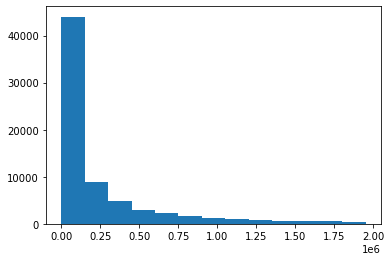

In [20]:
plt.hist(abundance_tot, bins=range(0, 2_000_000, 150_000));

### Analyse des $1^{er}$ digit

In [21]:
f_benford = benford.get_theoretical_freq_benford()
d_obs = benford.count_first_digit(abundance_tot)

### Histogramme de la fréquence des first digit de la loi de Benford et de l'abondance total des protéines

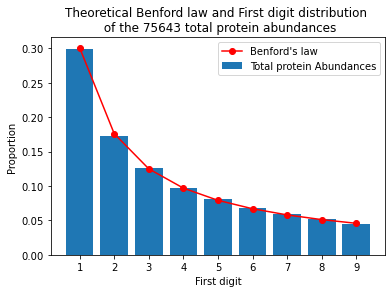

In [22]:
benford.build_hist_freq_ben(benford.normalize_first_digit(d_obs), f_benford, nb_digit=1,
                            title=("Theoretical Benford law and First digit distribution \n "
                            f"of the {sum(d_obs)} total protein abundances"),
                            legend="Total protein Abundances")

### Test statistique par la procédure "bootstrap"

In [23]:
%%time
statistics, p_val, nb_signif = benford.calculate_bootstrap_chi2(abundance_tot, f_benford, nb_digit=1)

statistics : 8.11591414398729 ; p-value : 0.42223003441247664 ; number of significant tests : 55
CPU times: user 3.7 s, sys: 23.4 ms, total: 3.72 s
Wall time: 3.74 s


In [24]:
if p_val > 0.05:
    print("Le résultat du test montre que le premier chiffre significatif de",
          "l'abondance total des protéines suit la loi de Benford pour un risque 𝛼=5%.")
else:
    print("Le résultat du test montre que le premier chiffre significatif de",
          "l'abondance total des protéines ne suit pas la loi de Benford pour un ",
          "risque 𝛼=5%.")

Le résultat du test montre que le premier chiffre significatif de l'abondance total des protéines suit la loi de Benford pour un risque 𝛼=5%.


## Analyse des deux $1^{er}$ digit

In [25]:
f_benford = benford.get_theoretical_freq_benford(2)
d_obs = benford.count_first_digit(abundance_tot, 2)

### Histogramme de la fréquence des first digit de la loi de Benford et de l'abondance des protéines de l'ensemble des données

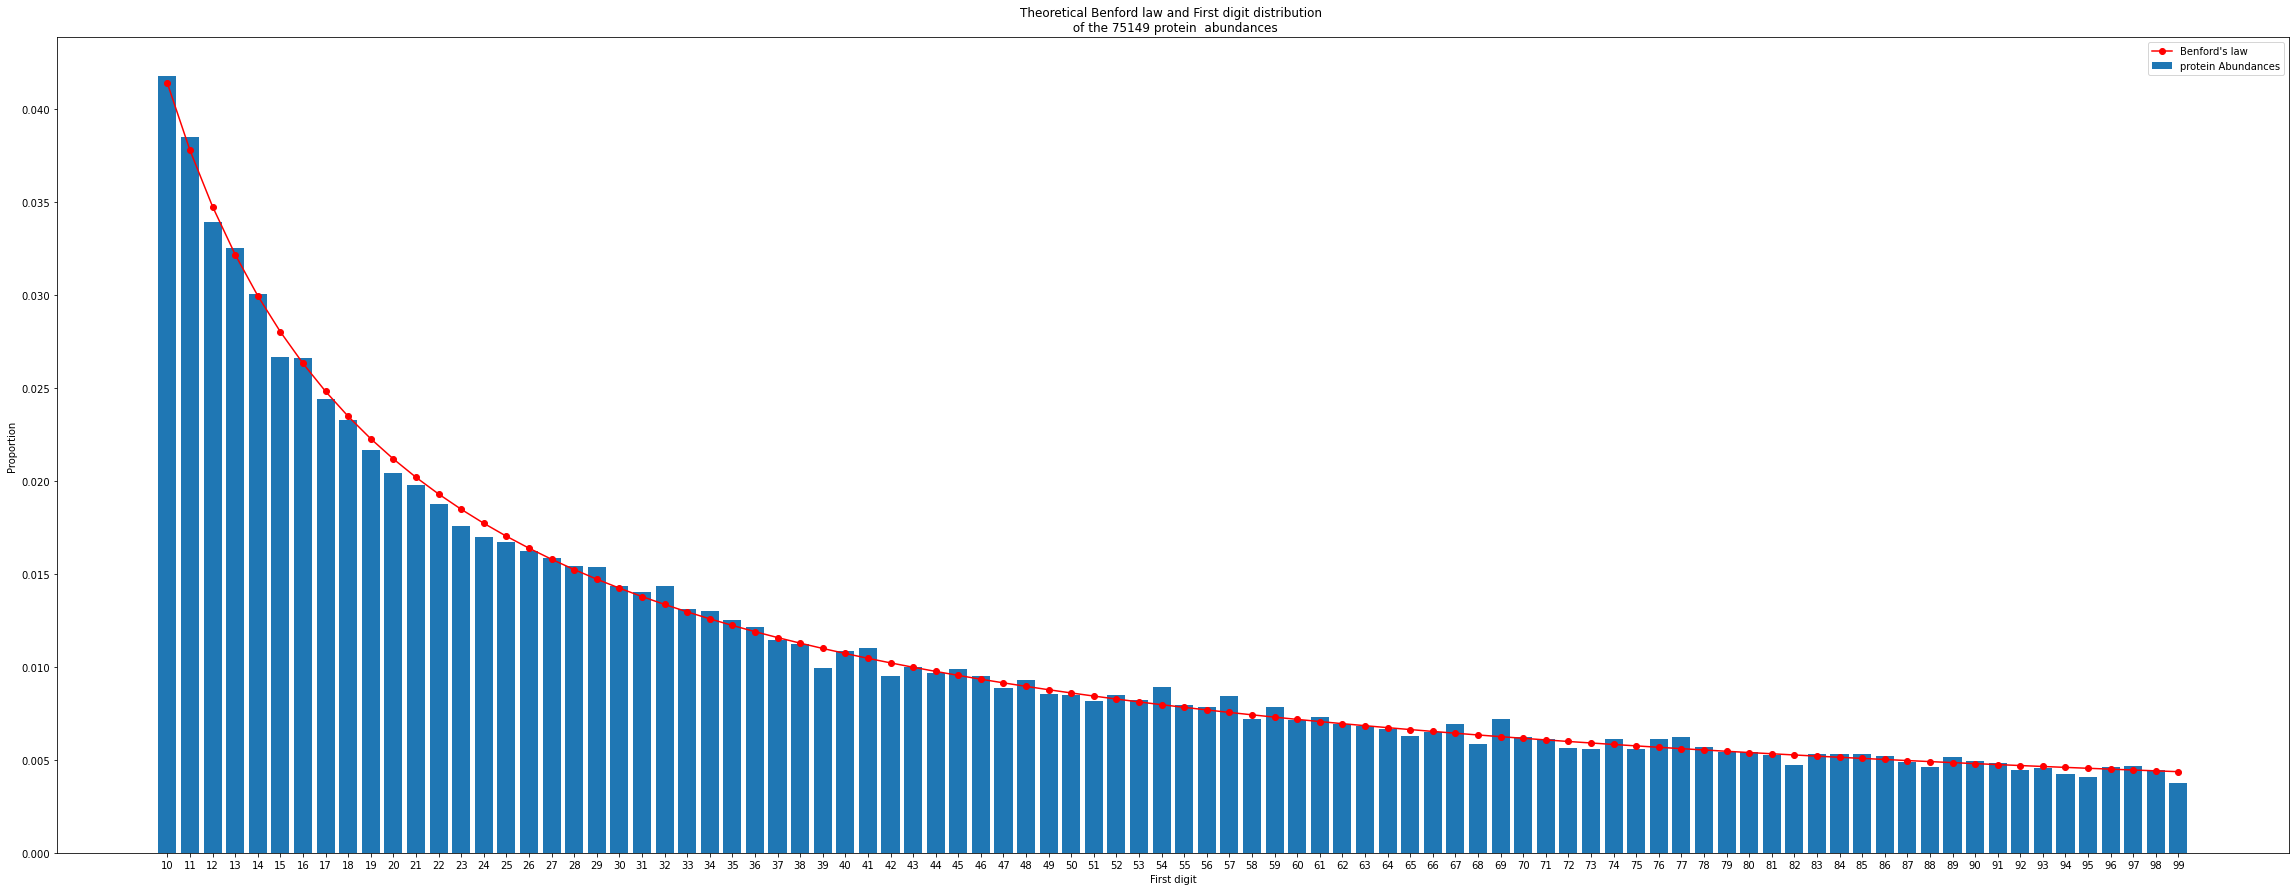

In [26]:
benford.build_hist_freq_ben(benford.normalize_first_digit(d_obs), f_benford, nb_digit=2,
                            title=("Theoretical Benford law and First digit distribution \n "
                            f"of the {sum(d_obs)} protein  abundances"),
                            legend="protein Abundances", size=(40, 15))

### Test statistique par la procédure "bootstrap"

In [27]:
%%time
statistics, P_val, nb_signif = benford.calculate_bootstrap_chi2(abundance_tot, f_benford, nb_digit=2)

statistics : 88.92071504124186 ; p-value : 0.4824303609592541 ; number of significant tests : 46
CPU times: user 3.39 s, sys: 4.66 ms, total: 3.39 s
Wall time: 3.39 s


In [28]:
if p_val > 0.05:
    print("Le résultat du test montre que les 2 premiers chiffres significatifs de",
          "l'abondance total des protéines suit la loi de Benford pour un risque 𝛼=5%.")
else:
    print("Le résultat du test montre que les 2 premiers chiffres significatifs de",
          "l'abondance total des protéines ne suit pas la loi de Benford pour un ",
          "risque 𝛼=5%.")

Le résultat du test montre que les 2 premiers chiffres significatifs de l'abondance total des protéines suit la loi de Benford pour un risque 𝛼=5%.


nous allons maintenant nous intéresser aux abondances de protéines obtenus pour les échantillon WT
## <font color='red'> Analyse sur les données d'abondance pour les échantillon WT</font>
### récupération des échantillon WT

In [29]:
wt_id = ['WT_control_1', 'WT_control_2']
white_type = data[wt_id]
print("abundance  WT:")
print(white_type.shape)
print(white_type)

abundance  WT:
(1917, 2)
      WT_control_1  WT_control_2
0     1.597321e+06  1.510281e+06
1     2.571727e+06  2.227859e+06
2     1.267556e+04  1.148202e+04
3     1.082784e+06  7.226234e+05
4     3.847340e+06  3.328870e+06
...            ...           ...
1912  0.000000e+00  0.000000e+00
1913  0.000000e+00  0.000000e+00
1914  0.000000e+00  0.000000e+00
1915  0.000000e+00  0.000000e+00
1916  0.000000e+00  0.000000e+00

[1917 rows x 2 columns]


In [30]:
# données dans un array d'une dimmenssion
white_type = white_type.values.reshape(white_type.shape[0] * white_type.shape[1])
print("abundance WT :")
print(white_type.shape)
print(white_type)

abundance WT :
(3834,)
[1597320.69  1510280.674 2571727.402 ...       0.          0.
       0.   ]


In [31]:
# remove 0
white_type = white_type[white_type > 0]
print(f"abundance WT : {white_type.shape}")

abundance WT : (3147,)


on obtient après nettoyage des données 3147 données d'abondance des échantillons WT
### histograme de la distribution des données d'abondance des échantillons WT

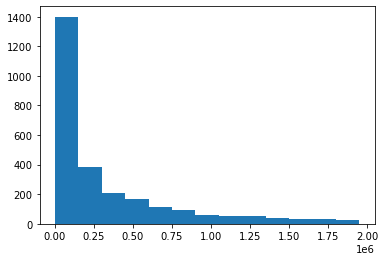

In [32]:
plt.hist(white_type, bins=range(0, 2_000_000, 150_000));

### Analyse des $1^{er}$ digit

In [33]:
f_benford = benford.get_theoretical_freq_benford()
d_obs = benford.count_first_digit(white_type)

### Histogramme de la fréquence des first digit de la loi de Benford et de l'abondance total des protéines des échantillons WT

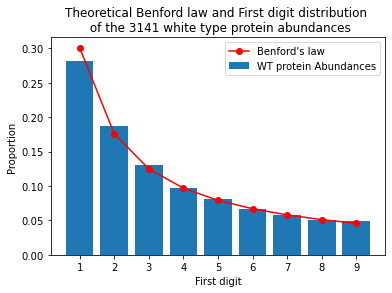

In [34]:
benford.build_hist_freq_ben(benford.normalize_first_digit(d_obs), f_benford, nb_digit=1,
                            title=("Theoretical Benford law and First digit distribution \n "
                            f"of the {sum(d_obs)} white type protein abundances"),
                            legend="WT protein Abundances")

On observe que le digit 1 à une fréqunece plus faible que celle de la loi théorique de Benford et le digit 2 à, lui, une fréquence plus élevé que loi théorique de Benford.
### Test statistique par la procédure "bootstrap"

In [35]:
%%time
statistics, p_val, nb_signif = benford.calculate_bootstrap_chi2(white_type, f_benford, nb_digit=1)

statistics : 7.954895708432163 ; p-value : 0.43788843453702064 ; number of significant tests : 48
CPU times: user 2.15 s, sys: 11.1 ms, total: 2.16 s
Wall time: 2.15 s


In [36]:
if p_val > 0.05:
    print("Le résultat du test montre que le premier chiffre significatif de",
          "l'abondance de protéines, pour les \néchantillons WT, suit la loi de Benford pour un risque 𝛼=5%.")
else:
    print("Le résultat du test montre que le premier chiffre significatif de",
          "l'abondance de protéines, pour les \néchantillons WT, ne suit pas la loi de Benford pour un ",
          "risque 𝛼=5%.")

Le résultat du test montre que le premier chiffre significatif de l'abondance de protéines, pour les 
échantillons WT, suit la loi de Benford pour un risque 𝛼=5%.


## Analyse des deux $1^{er}$ digit

In [37]:
f_benford = benford.get_theoretical_freq_benford(2)
d_obs = benford.count_first_digit(white_type, 2)

### Histogramme de la fréquence des first digit de la loi de Benford et de l'abondance des protéines des échantillons WT

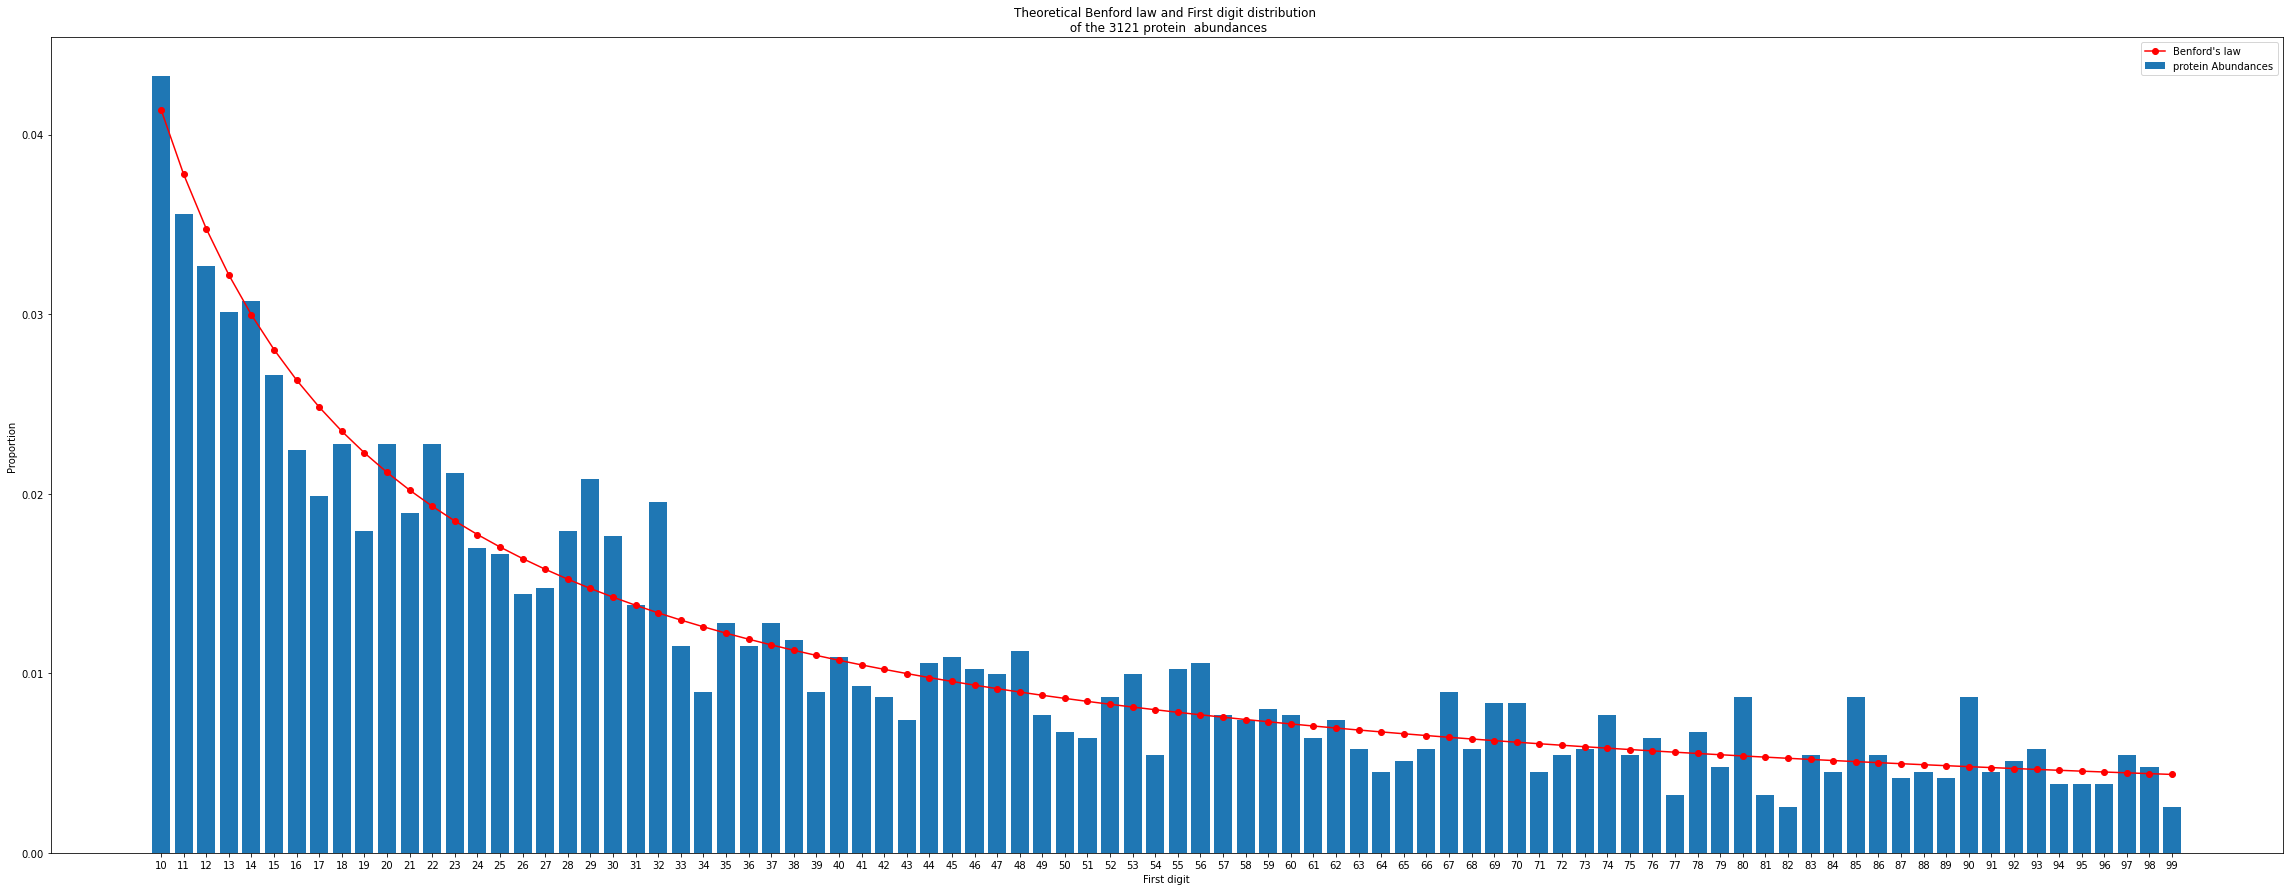

In [38]:
benford.build_hist_freq_ben(benford.normalize_first_digit(d_obs), f_benford, nb_digit=2,
                            title=("Theoretical Benford law and First digit distribution \n "
                            f"of the {sum(d_obs)} protein  abundances"),
                            legend="protein Abundances", size=(40, 15))

On observe un écart plus important entre la fréquence des 2 first digit de l'abondance de protéines, pour les échantillon WT, et celle de la loi théorique de Benford.
### Test statistique par la procédure "bootstrap"

In [39]:
%%time
statistics, P_val, nb_signif = benford.calculate_bootstrap_chi2(abundance_tot, f_benford, nb_digit=2)

statistics : 89.29420799731221 ; p-value : 0.47129722299904986 ; number of significant tests : 51
CPU times: user 3.42 s, sys: 8.11 ms, total: 3.43 s
Wall time: 3.43 s


In [40]:
if p_val > 0.05:
    print("Le résultat du test montre que les 2 premiers chiffres significatifs de",
          "l'abondance de protéines, \npour les échantillons WT, suit la loi de Benford pour un risque 𝛼=5%.")
else:
    print("Le résultat du test montre que les 2 premiers chiffres significatifs de",
          "l'abondance total de protéines, \npour les \néchantillons WT, ne suit pas la loi de Benford pour un ",
          "risque 𝛼=5%.")

Le résultat du test montre que les 2 premiers chiffres significatifs de l'abondance de protéines, 
pour les échantillons WT, suit la loi de Benford pour un risque 𝛼=5%.


Le résultat du test statistique, qui à une p-value supérieur à 5%, nous indique que l'abondance de protéines des échantillons WT suivent la loi de Benford pour les deux premiers chifres significatifs, pour un rique $\alpha$ de 5%.  
Le résultat du test est en contradiction avec ce qu'on pourrait penser en analysant l'Histogramme de la fréquence des deux premiers chiffres significatifs des échantillons WT.

nous allons maintenant nous intéresser aux abondances de protéines obtenus pour l'ensemble des échantillons non WT.
## <font color='red'> Analyse sur les données d'abondance pour des échantillons non WT</font>
### récupération des échantillons non WT

In [42]:
non_wt_id1 = ['AMFR_1', 'AMFR_2', 'BFAR_1', 'BFAR_2', 'CGRRF1_1',
       'CGRRF1_2', 'HRD1_1', 'HRD1_2', 'MARCH2_1', 'MARCH2_2', 'MARCH3_1',
       'MARCH3_2', 'MARCH4_1', 'MARCH4_2', 'MARCH6_1', 'MARCH6_2', 'MARCH8_1',
       'MARCH8_2', 'RNF5_1', 'RNF5_2', 'RNF13_1', 'RNF13_2', 'RNF26_1',
       'RNF26_2', 'RNF103_1', 'RNF103_2', 'RNF128_1', 'RNF128_2', 'RNF139_1',
       'RNF139_2', 'RNF148_1', 'RNF148_2', 'RNF170_1', 'RNF170_2', 'RNF185_1',
       'RNF185_2', 'RNFT1_1', 'RNFT1_2', 'Tmem129_1', 'Tmem129_2', 'Trim13_1',
       'Trim13_2', 'Trim59_1', 'Trim59_2', 'ZNRF4_1', 'ZNRF4_2']

''' not used
non_wt_id2 = ['R26_N_1', 'R26_N_2',
       'R26_NM_1', 'R26_NM_2', 'R13_1', 'R13_2', 'T59_1', 'T59_2', 'R145_1',
       'R145_2', 'R150_1', 'R150_2', 'Pool_1', 'Pool_2', 'HRD1_rerun_1',
       'HRD1_rerun_2', 'R13_repeat_1', 'R13_repeat_2', 'ZNRF4_repeat_1',
       'ZNRF4_repeat_2'] '''

non_wt1 = data[non_wt_id1]
print("non WT 1 :")
print(non_wt1.shape)
print(non_wt1.head())

non WT 1 :
(1917, 46)
         AMFR_1        AMFR_2        BFAR_1        BFAR_2      CGRRF1_1  \
0  653449.78450  6.365099e+05  8.297559e+05  7.523494e+05  8.883458e+05   
1  939360.24170  1.086076e+06  2.541636e+06  2.384330e+06  9.445967e+05   
2    2578.10604  3.096190e+03  8.704869e+03  4.587620e+03  4.843652e+03   
3  170103.36070  1.373951e+05  5.848435e+05  5.229952e+05  2.840173e+05   
4  696620.77780  7.875347e+05  1.752087e+06  2.024885e+06  1.527643e+06   

       CGRRF1_2        HRD1_1        HRD1_2      MARCH2_1      MARCH2_2  ...  \
0  8.619253e+05  4.912131e+05  5.133508e+05  9.476632e+05  1.063860e+06  ...   
1  9.851906e+05  2.513519e+06  2.134729e+06  8.823349e+05  1.089042e+06  ...   
2  4.662689e+03  1.339073e+04  1.041953e+04  5.112826e+04  4.803791e+04  ...   
3  3.033291e+05  4.074580e+05  3.529428e+05  4.556203e+05  5.441068e+05  ...   
4  1.503624e+06  3.768847e+06  3.383489e+06  1.509969e+06  1.592874e+06  ...   

        RNFT1_1       RNFT1_2      Tmem129_1  

In [43]:
# données dans un array d'une dimmenssion
non_wt1 = non_wt1.values.reshape(non_wt1.shape[0] * non_wt1.shape[1])
print("non WT 1 :")
print(non_wt1.shape)
print(non_wt1)

non WT 1 :
(88182,)
[653449.7845 636509.9156 829755.8643 ...      0.          0.
      0.    ]


In [47]:
# remove 0
non_wt_tot = non_wt1[non_wt1 > 0]
print(f"non WT 1 : {non_wt1.shape}")

non WT 1 : (72687,)


### Histogramme de la fréquence des first digit de la loi de Benford et de l'abondance total des protéines des échantillons non WT

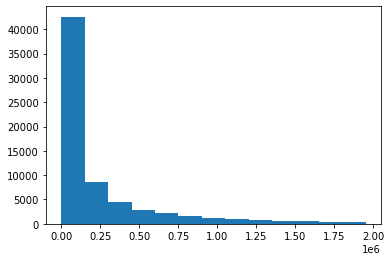

In [48]:
plt.hist(non_wt_tot, bins=range(0, 2_000_000, 150_000));

### Analyse des $1^{er}$ digit

In [49]:
f_benford = benford.get_theoretical_freq_benford()
d_obs = benford.count_first_digit(non_wt_tot)

### Histogramme de la fréquence des first digit de la loi de Benford et de l'abondance total des échantillons non WT

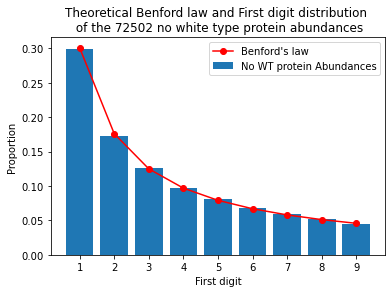

In [50]:
benford.build_hist_freq_ben(benford.normalize_first_digit(d_obs), f_benford, nb_digit=1,
                            title=("Theoretical Benford law and First digit distribution \n "
                            f"of the {sum(d_obs)} no white type protein abundances"),
                            legend="No WT protein Abundances")

### Test statistique par la procédure "bootstrap"

In [51]:
%%time
statistics, p_val, nb_signif = benford.calculate_bootstrap_chi2(non_wt_tot, f_benford, nb_digit=1)

statistics : 8.246388476011107 ; p-value : 0.4097798909690807 ; number of significant tests : 62
CPU times: user 3.14 s, sys: 5.3 ms, total: 3.14 s
Wall time: 3.14 s


In [52]:
if p_val > 0.05:
    print("Le résultat du test montre que le premier chiffre significatif de",
          "l'abondance de protéines, pour les \néchantillons non WT, suit la loi de Benford pour un risque 𝛼=5%.")
else:
    print("Le résultat du test montre que le premier chiffre significatif de",
          "l'abondance de protéines, pour les \néchantillons non WT, ne suit pas la loi de Benford pour un ",
          "risque 𝛼=5%.")

Le résultat du test montre que le premier chiffre significatif de l'abondance de protéines, pour les 
échantillons non WT, suit la loi de Benford pour un risque 𝛼=5%.


## Analyse des deux $1^{er}$ digit

In [53]:
f_benford = benford.get_theoretical_freq_benford(2)
d_obs = benford.count_first_digit(non_wt_tot, 2)

### Histogramme de la fréquence des first digit de la loi de Benford et de l'abondance des protéines des échantillons non WT

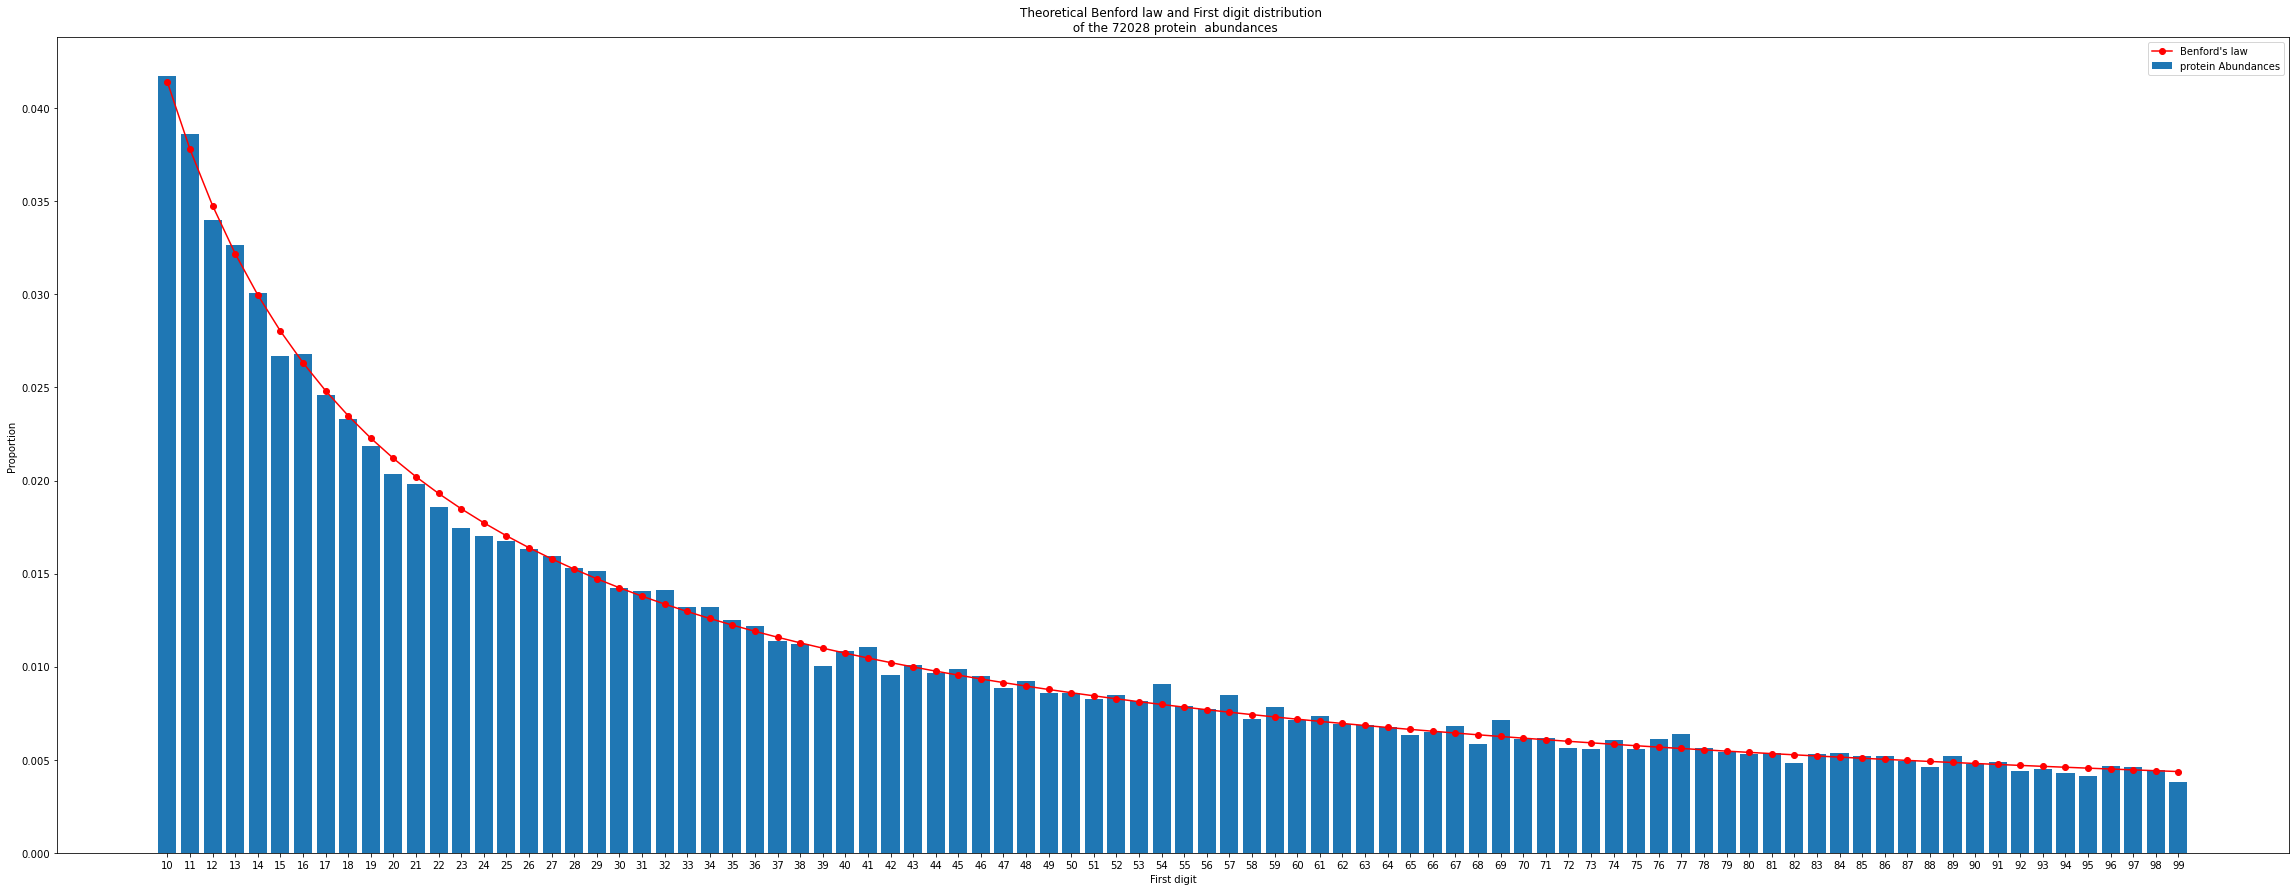

In [54]:
benford.build_hist_freq_ben(benford.normalize_first_digit(d_obs), f_benford, nb_digit=2,
                            title=("Theoretical Benford law and First digit distribution \n "
                            f"of the {sum(d_obs)} protein  abundances"),
                            legend="protein Abundances", size=(40, 15))

### Test statistique par la procédure "bootstrap"

In [55]:
%%time
statistics, P_val, nb_signif = benford.calculate_bootstrap_chi2(non_wt_tot, f_benford, nb_digit=2)

statistics : 88.36114152314154 ; p-value : 0.4991917907035394 ; number of significant tests : 46
CPU times: user 3.37 s, sys: 5.74 ms, total: 3.38 s
Wall time: 3.38 s


In [56]:
if p_val > 0.05:
    print("Le résultat du test montre que les 2 premiers chiffres significatifs de",
          "l'abondance de protéines, \npour les échantillons non WT, suit la loi de Benford pour un risque 𝛼=5%.")
else:
    print("Le résultat du test montre que les 2 premiers chiffres significatifs de",
          "l'abondance total de protéines, \npour les \néchantillons non WT, ne suit pas la loi de Benford pour un ",
          "risque 𝛼=5%.")

Le résultat du test montre que les 2 premiers chiffres significatifs de l'abondance de protéines, 
pour les échantillons non WT, suit la loi de Benford pour un risque 𝛼=5%.


nous allons maintenant nous intéresser aux abondances de protéines obtenus pour chacunes des conditions non WT.
## <font color='red'> Analyse sur les données d'abondance pour pour chacunes des conditions non WT </font>
### <font color='green'> Analyse des données d'abondance de protéines pour la condition AMFR </font>
#### récupération des données de la condition AMFR et nettyage des données

In [83]:
condition_id = ['AMFR_1', 'AMFR_2']
condition = data[condition_id]
print("\ncondition AMFR :")
print(condition.shape)
print(condition.head())


condition AMFR :
(1917, 2)
         AMFR_1        AMFR_2
0  653449.78450  6.365099e+05
1  939360.24170  1.086076e+06
2    2578.10604  3.096190e+03
3  170103.36070  1.373951e+05
4  696620.77780  7.875347e+05


In [58]:
# données dans un array d'une dimmenssion
condition = condition.values.reshape(condition.shape[0] * condition.shape[1])
print("\ncondition AMFR :")
print(condition.shape)
print(condition)


condition AMFR :
(3834,)
[653449.7845 636509.9156 939360.2417 ...      0.          0.
      0.    ]


In [59]:
# remove 0
condition = condition[condition > 0]
print(f"condition AMFR : {condition.shape}")

condition AMFR : (3149,)


### Histogramme de la fréquence des first digit de la loi de Benford et de l'abondance des protéines de la condition AMFR

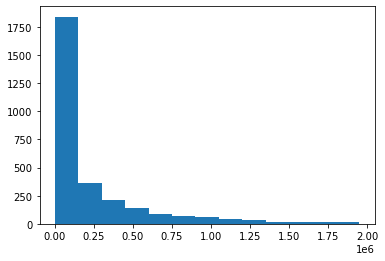

In [60]:
plt.hist(condition, bins=range(0, 2_000_000, 150_000));

### Analyse des $1^{er}$ digit

In [61]:
f_benford = benford.get_theoretical_freq_benford()
d_obs = benford.count_first_digit(condition)

### Histogramme de la fréquence des first digit de la loi de Benford et de l'abondance de la condition AMFR

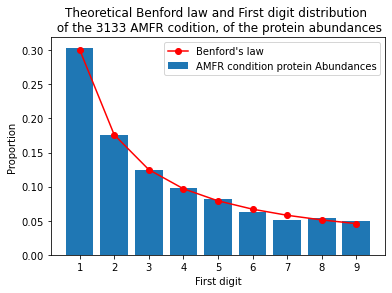

In [62]:
benford.build_hist_freq_ben(benford.normalize_first_digit(d_obs), f_benford, nb_digit=1,
                            title=("Theoretical Benford law and First digit distribution \n "
                            f"of the {sum(d_obs)} AMFR codition, of the protein abundances"),
                            legend="AMFR condition protein Abundances")

### Test statistique par la procédure "bootstrap"

In [63]:
%%time
statistics, p_val, nb_signif = benford.calculate_bootstrap_chi2(condition, f_benford, nb_digit=1)

statistics : 7.388296344102994 ; p-value : 0.49537531327061723 ; number of significant tests : 21
CPU times: user 2.14 s, sys: 13.9 ms, total: 2.15 s
Wall time: 2.14 s


In [64]:
if p_val > 0.05:
    print("Le résultat du test montre que le premier chiffre significatif de",
          "l'abondance de protéines, pour la \ncondition AMFR, suit la loi de Benford pour un risque 𝛼=5%.")
else:
    print("Le résultat du test montre que le premier chiffre significatif de",
          "l'abondance de protéines, pour la \ncondition AMFR, ne suit pas la loi de Benford pour un ",
          "risque 𝛼=5%.")

Le résultat du test montre que le premier chiffre significatif de l'abondance de protéines, pour la 
condition AMFR, suit la loi de Benford pour un risque 𝛼=5%.


## Analyse des deux $1^{er}$ digit

In [65]:
f_benford = benford.get_theoretical_freq_benford(2)
d_obs = benford.count_first_digit(condition, 2)

### Histogramme de la fréquence des first digit de la loi de Benford et de l'abondance de la condition AMFR

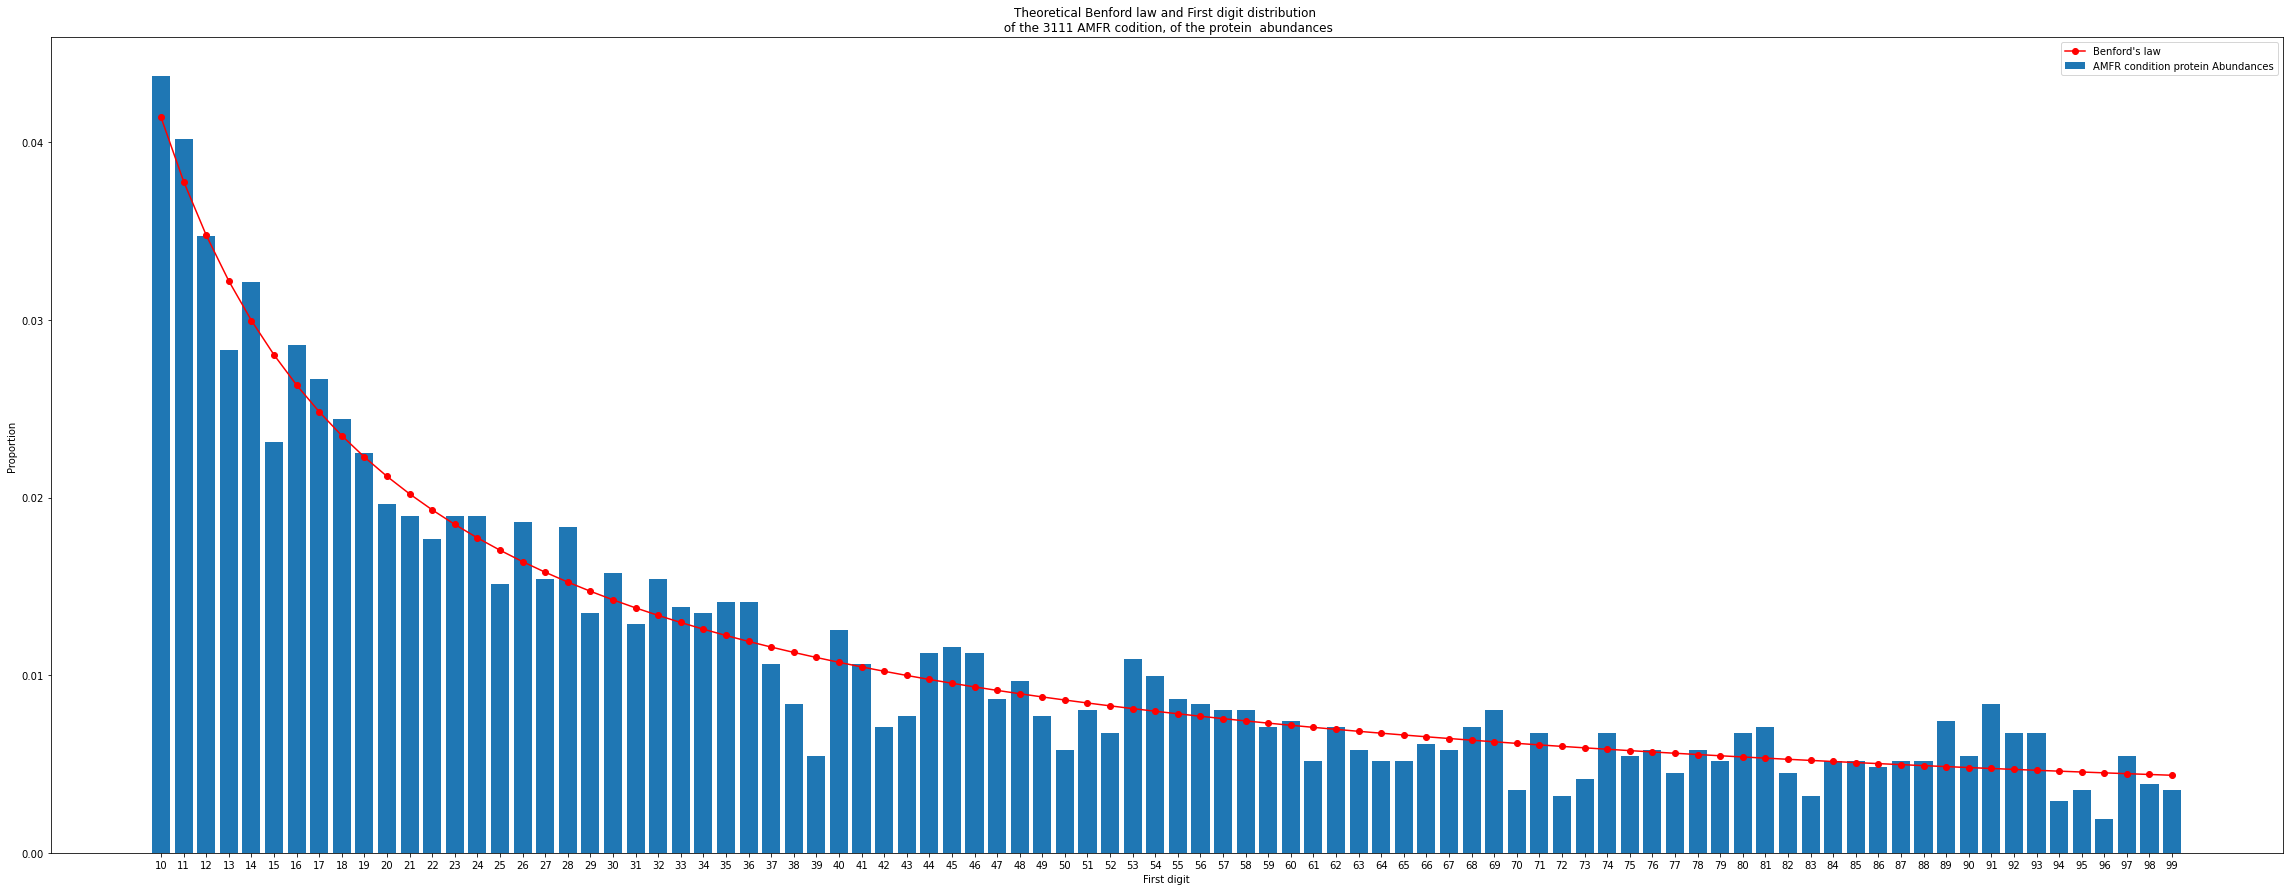

In [66]:
benford.build_hist_freq_ben(benford.normalize_first_digit(d_obs), f_benford, nb_digit=2,
                            title=("Theoretical Benford law and First digit distribution \n "
                            f"of the {sum(d_obs)} AMFR codition, of the protein  abundances"),
                            legend="AMFR condition protein Abundances", size=(40, 15))

On observe un écart entre la fréquence des 2 first digit de l'abondance de protéines pour la \ncondition AMFR, et celle de la loi théorique de Benford.
### Test statistique par la procédure "bootstrap"

In [67]:
%%time
statistics, P_val, nb_signif = benford.calculate_bootstrap_chi2(condition, f_benford, nb_digit=2)

statistics : 90.13827574847598 ; p-value : 0.4463458856587948 ; number of significant tests : 41
CPU times: user 2.38 s, sys: 15.5 ms, total: 2.39 s
Wall time: 2.38 s


In [69]:
if p_val > 0.05:
    print("Le résultat du test montre que les 2 premiers chiffres significatifs de",
          "l'abondance \nde protéines, pour la condition AMFR, suit la loi de Benford pour un risque 𝛼=5%.")
else:
    print("Le résultat du test montre que les 2 premiers chiffres significatifs de",
          "l'abondance \nde protéines, \npour la condition AMFR, ne suit pas la loi de Benford pour un ",
          "risque 𝛼=5%.")

Le résultat du test montre que les 2 premiers chiffres significatifs de l'abondance 
de protéines, pour la condition AMFR, suit la loi de Benford pour un risque 𝛼=5%.


Nous allons maintenant réaliser l'anaylse sur chacune des condition. Les resultats de la statistique et de la p-value sera stocké dans un tableau pour chacune des conditions.
### <font color='green'> Analyse des données d'abondance de protéines pour chacunes des conditions </font>
#### récupération des données et nettyage des données

In [85]:
condition_id = [['AMFR_1', 'AMFR_2'], ['BFAR_1', 'BFAR_2'], ['CGRRF1_1', 'CGRRF1_2'],
                ['HRD1_1', 'HRD1_2'], ['MARCH2_1', 'MARCH2_2'], ['MARCH3_1', 'MARCH3_2'],
                ['MARCH4_1', 'MARCH4_2'], ['MARCH6_1', 'MARCH6_2'], ['MARCH8_1', 'MARCH8_2'],
                ['RNF5_1', 'RNF5_2'], ['RNF13_1', 'RNF13_2'], ['RNF26_1', 'RNF26_2'],
                ['RNF103_1', 'RNF103_2'], ['RNF128_1', 'RNF128_2'], ['RNF139_1', 'RNF139_2'],
                ['RNF148_1', 'RNF148_2'], ['RNF170_1', 'RNF170_2'], ['RNF185_1', 'RNF185_2'],
                ['RNFT1_1', 'RNFT1_2'], ['Tmem129_1', 'Tmem129_2'], ['Trim13_1', 'Trim13_2'],
                ['Trim59_1', 'Trim59_2'], ['ZNRF4_1', 'ZNRF4_2']]

condition_name = ['AMFR', 'BFAR', 'CGRRF1', 'HRD1', 'MARCH2_1', 'MARCH3', 'MARCH4', 'MARCH6',
                  'MARCH8', 'RNF5', 'RNF13', 'RNF26', 'RNF103', 'RNF128', 'RNF139', 'RNF148',
                  'RNF170', 'RNF185', 'RNFT1', 'Tmem129', 'Trim13', 'Trim59', 'ZNRF4']
print(len(condition_id))
print(len(condition_name))

23
23


#### Analyse de la conformité des données des conditions pour le $1^{er}$ chiffre significatif

In [91]:
%%time
pval_list = []
stat_list = []
f_benford = benford.get_theoretical_freq_benford()
for i in range(len(condition_id)):
    condition = data[condition_id[i]]
    # données dans un array d'une dimmenssion
    condition = condition.values.reshape(condition.shape[0] * condition.shape[1])
    # remove 0
    condition = condition[condition > 0]
    # récupération des first digit
    d_obs = benford.count_first_digit(condition)
    statistics, p_val, nb_signif = benford.calculate_bootstrap_chi2(condition, f_benford, nb_digit=1)
    pval_list.append(p_val); stat_list.append(statistics);

statistics : 7.103853066124463 ; p-value : 0.5254703509734071 ; number of significant tests : 21
0
statistics : 8.715070543827077 ; p-value : 0.36689948893687896 ; number of significant tests : 67
1
statistics : 8.963278805534133 ; p-value : 0.3454031898350336 ; number of significant tests : 70
2
statistics : 8.99053286164089 ; p-value : 0.3430952235714864 ; number of significant tests : 61
3
statistics : 9.027194505572934 ; p-value : 0.3400070575884248 ; number of significant tests : 72
4
statistics : 6.4169823863433235 ; p-value : 0.6006299572267424 ; number of significant tests : 8
5
statistics : 7.416409638654588 ; p-value : 0.4924420658325068 ; number of significant tests : 20
6
statistics : 9.423084760173138 ; p-value : 0.30787079011242713 ; number of significant tests : 96
7
statistics : 12.856550613741566 ; p-value : 0.11688148813507217 ; number of significant tests : 273
8
statistics : 7.611203686754988 ; p-value : 0.47233944917810144 ; number of significant tests : 34
9
stati

In [110]:
col_name = ['Condition', 'p-value', 'Statistics']
pd.DataFrame((condition_name[0:12], pval_list[0:12], stat_list[0:12], condition_name[12:],
              pval_list[12:], stat_list[12:]), index = col_name * 2)

,0,1,2,3,4,5,6,7,8,9,10,11
Condition,AMFR,BFAR,CGRRF1,HRD1,MARCH2_1,MARCH3,MARCH4,MARCH6,MARCH8,RNF5,RNF13,RNF26
p-value,0.52547,0.366899,0.345403,0.343095,0.340007,0.60063,0.492442,0.307871,0.116881,0.472339,0.377142,0.567923
Statistics,7.103853,8.715071,8.963279,8.990533,9.027195,6.416982,7.41641,9.423085,12.856551,7.611204,8.60013,6.712706
Condition,RNF103,RNF128,RNF139,RNF148,RNF170,RNF185,RNFT1,Tmem129,Trim13,Trim59,ZNRF4,None
p-value,0.564496,0.219184,0.274237,0.20536,0.096292,0.487768,0.390651,0.524275,0.640308,0.295626,0.376058,None
Statistics,6.743929,10.701647,9.87044,10.935867,13.482494,7.461364,8.45152,7.115021,6.061817,9.581629,8.612207,None


Les resultats des tests statistiques de conformité à la loi théorique de Benford nous indique que chacunes des conditions suient la loi de Benford, pour un risque $\alpha$ de 5%.  

On remarque que certaines p-values et statisques obtenus pour certaines condition sont faible, comme pour MARCH8 et RNF170 qui ont une p-value inférieur à 0.2.  

Nous allons réaliser l'histogramme de la fréquence du premier chhiffre significatif par rapport à la loi thhéorique de Benford pour ces deux conditions.  

#### Histogramme de la fréquence du $1^{er}$ chiffre significatif pour les conditions MARCHH8 et RNF170

In [113]:
''' Donnés pour la condition MARCH8 '''
condition_id = ['MARCH8_1', 'MARCH8_2']
condition = data[condition_id]
condition = data[condition_id]
# données dans un array d'une dimmenssion
condition = condition.values.reshape(condition.shape[0] * condition.shape[1])
# remove 0
condition = condition[condition > 0]
# récupération des first digit
d_obs = benford.count_first_digit(condition)

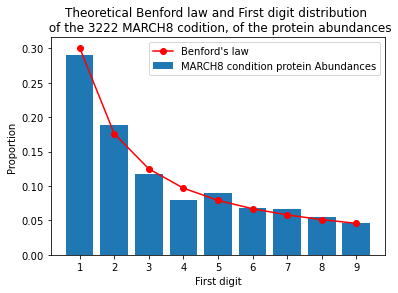

In [114]:
benford.build_hist_freq_ben(benford.normalize_first_digit(d_obs), f_benford, nb_digit=1,
                            title=("Theoretical Benford law and First digit distribution \n "
                            f"of the {sum(d_obs)} protein abundances, of the MARCH8 codition"),
                            legend="MARCH8 condition protein Abundances")

On remarque que la fréquence du digit 4 est très inférieur à la loi thhéorique de Benford, on remarque ègalement une fréquence plus faible pour les digit 1 et 3, ainsi qu'une fréquence plus élevé pour les digit 3, 5, et 7. Cela explique la faible p-value obtenu lors du tets statistique réalisé.

In [116]:
''' Donnés pour la condition MARCH8 '''
condition_id = ['RNF170_1', 'RNF170_2']
condition = data[condition_id]
condition = data[condition_id]
# données dans un array d'une dimmenssion
condition = condition.values.reshape(condition.shape[0] * condition.shape[1])
# remove 0
condition = condition[condition > 0]
# récupération des first digit
d_obs = benford.count_first_digit(condition)

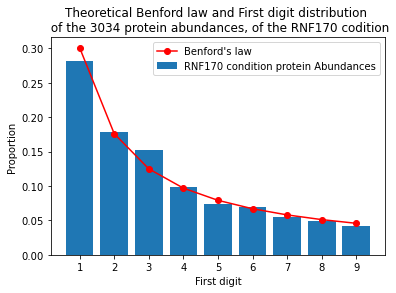

In [117]:
benford.build_hist_freq_ben(benford.normalize_first_digit(d_obs), f_benford, nb_digit=1,
                            title=("Theoretical Benford law and First digit distribution \n "
                            f"of the {sum(d_obs)} protein abundances, of the RNF170 codition"),
                            legend="RNF170 condition protein Abundances")

Ici, la faible p-value obtenu, pour la condition RNF170, est expliqué par la fréquence des first digit 1 et 3. On remarque que la fréquence du digit 1 est plus faible et que celle du digit 3 est plus élevé par rapport à la loi thhhéorique de Benford.  

# Conclusion

L'abondance des protéines de l'ensemble des données suit la loi de Benford et la condtion contrôle (WT) ainsi que les aures conditions suivent la loi de Benford. On remarque néanmoins que les conditions MARCH8 et RNF170 on obtenu une p-value faible, mais tout même non significatifs. Le résultat des p-value obtenues à été expliqués en représentant l'hhistogramme de la fréquence des premiers chiffres significatifs en superposant la loi théorique de Benford.  

Les resultats obtenus lors de l'analyse de ce jeu de donnés semblent confirmer que l'abondance de protéines issues d'expériences suit la loi de Benford. Cela conforte l'idée d'utilisation de la loi de Benford comme un controle qualité des résultats obtenus par le spectromètre de masse.